# OSEMN Exercises

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [ ]:
import numpy as np
#generate random numbers
randomarray=np.random.random(size=(10))
l=randomarray.tolist()
#print(l)
#create file,though quicker with numpy methods
file1=open("simple_data.txt","w")
#write and close file
for i in l:
    file1.write(str(i))
file1.close()
#!cat simple_data.txt

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [ ]:
import numpy as np
#generate random numbers
randomarray=np.random.random(size=(5,5))
#print(randomarray)
#write the file, format(fmt)=string(%s)
np.savetxt("data.txt",randomarray,delimiter=" ", fmt="%s")

#!cat data.txt

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [ ]:
with open("data.txt","r") as file1:
    with open("data.csv","w") as file2:
        for line in file1:
            l=line.split()
            for i in l:
                file2.write(i)
                file2.write(",")
#!cat data.csv

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [ ]:
with open('credit_card.dat','r') as file:
    wordlenght=6
    for line in file:
        creditcardnumber=[] #empty list to save words(already converted in char)
        word=[] #empty list to save bits
        for i,j in enumerate(line):
            if i==len(line)-4: #arrived to the end of the line
                print("\n")
                break
            if len(word)==6:
                sum=0
                for k,s in enumerate(word):
                    sum+=int(s)*2**(5-k)
                creditcardnumber.append(chr(int(sum)))
                word.clear()
                word.append(j)
            if (i==0 or not i%wordlenght==0):#compose word
                word.append(j)
        #put together list elements
        code=""
        for i in creditcardnumber:
            code=code+i
        print(code)
                
            

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [ ]:
#!cat user_data.json
import json
import csv
data = json.load(open('user_data.json'))
with open('user_data.csv', mode='w') as file:
    fieldnames = ['ID',"JobTitle","EmailAddress","FirstNameLastName","CreditCard","CreditCardType"]
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in data:
        if i["CreditCardType"]=="American Express":
            writer.writerow(i)
#!cat user_data.csv            

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


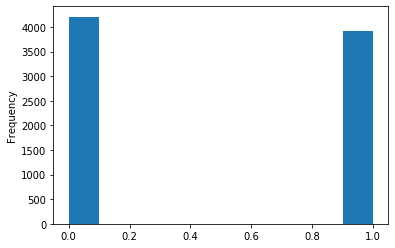

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"
D=pd.read_csv(url)
D["class"].plot(kind='hist')
#as seen in the files, only two values are present in the class column: 0 and 1
#so it's not surprising those are the only filled bins
#also the sum of the heights of the columns corresponds to the total number of entries
#conferming we are not skipping anything

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

Text(0, 0.5, 'features_3')

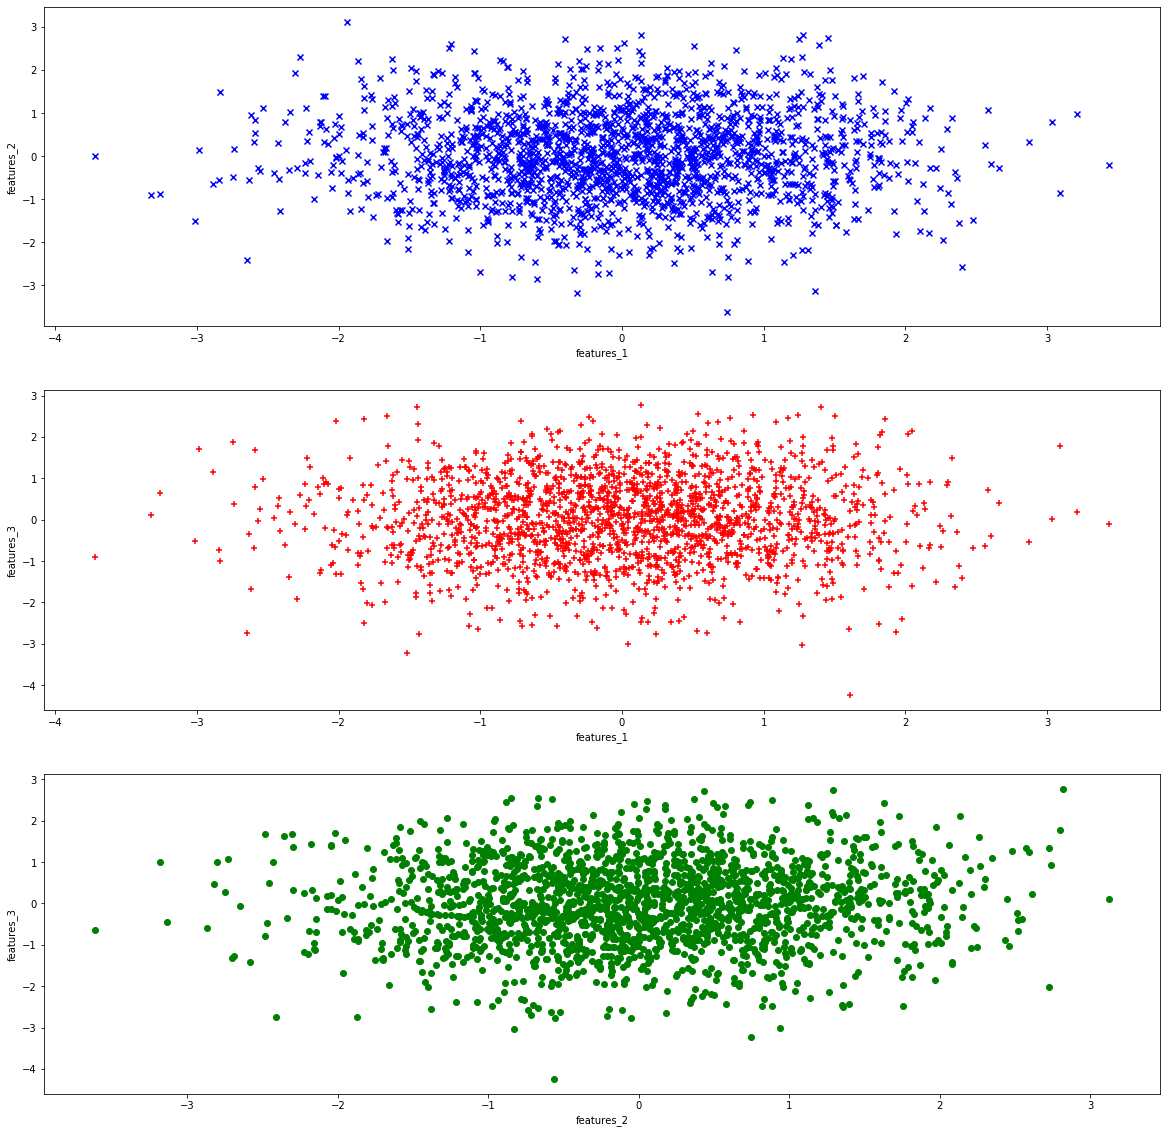

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#bigger plots
plt.rcParams['figure.figsize'] = [20, 20]

url="https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1"
D=pd.read_csv(url)
plt.subplot(3,1,1)
plt.scatter( D["features_1"], D["features_2"],marker="x",c='b')
plt.xlabel('features_1')
plt.ylabel('features_2')
plt.subplot(3,1,2)
plt.scatter( D["features_1"], D["features_3"],marker="+",c='r')
plt.xlabel('features_1')
plt.ylabel('features_3')
plt.subplot(3,1,3)
plt.scatter( D["features_2"], D["features_3"],marker="o",c='g')
plt.xlabel('features_2')
plt.ylabel('features_3')


8\. Load the same file of point 6, and convert the file to json with Pandas.

In [2]:
import pandas as pd

url="https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"
D=pd.read_csv(url)
D.to_json("mushrooms_categorized.json")
#!cat mushrooms_categorized.json